Кількість повідомлень за категоріями: Counter({'ham': 4825, 'spam': 747})


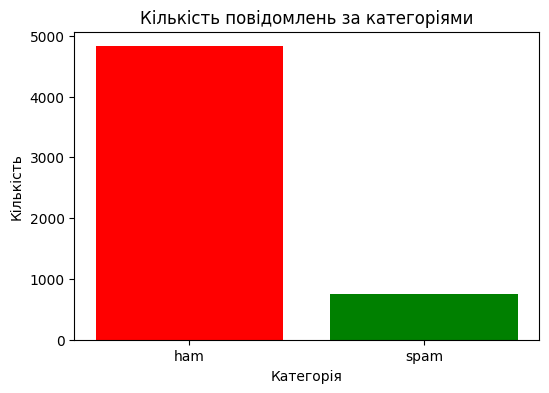

Бібліотека wordcloud не встановлена. Хмари слів пропущені.
Пропущено візуалізацію для 'spam' через відсутність wordcloud
Пропущено візуалізацію для 'ham' через відсутність wordcloud
Розмір навчальної вибірки: (4457,) (4457,)
Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.99      0.99       971
        spam       0.93      0.97      0.95       144

    accuracy                           0.99      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Confusion Matrix:
[[961  10]
 [  4 140]]


In [12]:
# Імпортуємо необхідні бібліотеки
import pandas as pd  # для роботи з таблицями та даними
import numpy as np  # для математичних операцій та масивів
import matplotlib.pyplot as plt  # для створення графіків та візуалізацій

from sklearn.feature_extraction.text import CountVectorizer  # для перетворення тексту у векторну форму
from sklearn.naive_bayes import MultinomialNB  # наївний баєсівський класифікатор для тексту
from sklearn.metrics import classification_report, confusion_matrix  # для оцінки точності моделі
from sklearn.model_selection import train_test_split  # для розділення даних на навчальні та тестові
from collections import Counter  # для підрахунку кількості елементів у колекції


# Завантаження даних
url = 'https://drive.google.com/file/d/1b5p4CJMDpOzkmQIi5Jk9PLxD8reHzj6S/view?usp=sharing'  # посилання на Google Drive
url_ = 'https://drive.google.com/uc?id=' + url.split('/')[-2]  # перетворюємо посилання для прямого завантаження
df = pd.read_csv(url_)  # читаємо CSV файл у DataFrame


# Підрахунок кількості повідомлень у кожній категорії
category_counts = Counter(df['target'])  # рахуємо кількість 'spam' та 'ham'
print("Кількість повідомлень за категоріями:", category_counts)  # виводимо результат


# Візуалізація кількості спаму та ham через bar-графік
plt.figure(figsize=(6,4))  # задаємо розмір графіка
plt.bar(category_counts.keys(), category_counts.values(), color=['red','green'])  # створюємо стовпчикову діаграму
plt.title("Кількість повідомлень за категоріями")  # заголовок графіка
plt.xlabel("Категорія")  # підпис осі X
plt.ylabel("Кількість")  # підпис осі Y
plt.show()  # відображаємо графік


# Перевірка наявності wordcloud для хмар слів
try:
    from wordcloud import WordCloud  # імпортуємо WordCloud
    WORDCLOUD_AVAILABLE = True  # прапорець для перевірки наявності бібліотеки
except ModuleNotFoundError:
    print("Бібліотека wordcloud не встановлена. Хмари слів пропущені.")
    WORDCLOUD_AVAILABLE = False  # якщо бібліотеки немає, прапорець False


# Функція для створення хмари слів
def visualize(label):
    if not WORDCLOUD_AVAILABLE:  # якщо бібліотека недоступна
        print(f"Пропущено візуалізацію для '{label}' через відсутність wordcloud")
        return  # пропускаємо функцію
    # об'єднуємо всі повідомлення певної категорії в один рядок та переводимо в нижній регістр
    text = ' '.join(df[df['target']==label]['text'].str.lower())
    # створюємо об'єкт WordCloud та генеруємо хмару слів
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)  # відображаємо зображення
    plt.axis('off')  # вимикаємо осі
    plt.show()  # показуємо графік


# Викликаємо візуалізацію для спаму та ham
visualize('spam')
visualize('ham')


# Розділення даних на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.20)  # 80% навчання, 20% тест
print("Розмір навчальної вибірки:", X_train.shape, y_train.shape)  # перевіряємо розмір навчальної вибірки


# Векторизація тексту
vectorizer = CountVectorizer()  # створюємо об'єкт CountVectorizer
X_train_transformed = vectorizer.fit_transform(X_train)  # навчаємо векторизатор на навчальних даних та трансформуємо їх
X_test_transformed = vectorizer.transform(X_test)  # трансформуємо тестові дані (без повторного навчання)


# Навчання моделі
clf = MultinomialNB(alpha=0.1)  # створюємо наївний баєсівський класифікатор з alpha=0.1
clf.fit(X_train_transformed, y_train)  # навчаємо модель на навчальних даних
y_pred = clf.predict(X_test_transformed)  # робимо передбачення на тестових даних


# Оцінка моделі
print("Classification Report:")  # заголовок
print(classification_report(y_test, y_pred))  # precision, recall, f1-score для кожного класу
print("Confusion Matrix:")  # заголовок
print(confusion_matrix(y_test, y_pred))  # матриця плутанини
